# 0.1: Setup

In [67]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [68]:
# Setting matplotlib to display graphs in notebook

%matplotlib inline

In [3]:
# Defining File path
path = r'/Users/joefeuille/CF Analysis/Spotify Analysis'

In [4]:
# Importing master data set
master = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'global_final_master.pkl'))

In [5]:
master.shape

(15722, 31)

In [6]:
master.head()

,Position,Track Name,Artist,Streams,URL,Week,Country,Country_Code,Track ID,Album,...,Time_Signature,Key,Mode,Valence,Duration,Explicit,Markets,Countries Rep,Weeks Count,_merge
0,1,STAY (with Justin Bieber),The Kid LAROI,2031338.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/30/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",8,10,both
1,1,STAY (with Justin Bieber),The Kid LAROI,2260974.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/23/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",8,10,both
2,1,STAY (with Justin Bieber),The Kid LAROI,2277839.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/16/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",8,10,both
3,1,STAY (with Justin Bieber),The Kid LAROI,2367836.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/09/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",8,10,both
4,1,STAY (with Justin Bieber),The Kid LAROI,2535418.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/02/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",8,10,both


# 0.2: Data Prep

In [7]:
# Pulling all AU & TR data from set for analysis

AU = master[master['Country_Code'] == 'AU']
TR = master[master['Country_Code'] == 'TR']

In [8]:
# Paring down AU & TR dfs into only numerical columns

df1_sel = AU[['Position', 'Streams', 'Length', 'Popularity',
                'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
                'Liveness', 'Loudness', 'Speechiness', 'Tempo',
                'Time_Signature', 'Key', 'Valence', 'Countries Rep', 'Weeks Count']]
df2_sel = TR[['Position', 'Streams', 'Length', 'Popularity',
                'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
                'Liveness', 'Loudness', 'Speechiness', 'Tempo',
                'Time_Signature', 'Key', 'Valence', 'Countries Rep', 'Weeks Count']]

In [9]:
print("AU sel:", df1_sel.shape,
     "TR sel:", df2_sel.shape)

AU sel: (2000, 17) TR sel: (1996, 17)


In [10]:
master['Country_Code'].value_counts()

JP    2000
AU    2000
UK    2000
TR    1996
HK    1991
US    1990
BR    1930
IN    1815
Name: Country_Code, dtype: int64

# 0.3: Using Elbow Curve to determine number of clusters

In [11]:
# Prep for AU elbow plot

df1_num_cl = range(1,15) # Defines range of potential clusters
df1_kmeans = [KMeans(n_clusters=i) for i in df1_num_cl] #Defines k-means clusters according to range

df1_score = [df1_kmeans[i].fit(df1_sel).score(df1_sel)
            for i in range(len(df1_kmeans))]

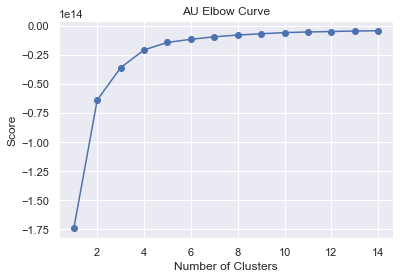

In [12]:
# Plotting AU elbow curve

pl.plot(df1_num_cl, df1_score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('AU Elbow Curve')
pl.show()

In [13]:
# Prep for TR elbow plot

df2_num_cl = range(1,15)
df2_kmeans = [KMeans(n_clusters=i) for i in df2_num_cl]

df2_score = [df2_kmeans[i].fit(df2_sel).score(df2_sel)
            for i in range(len(df2_kmeans))]

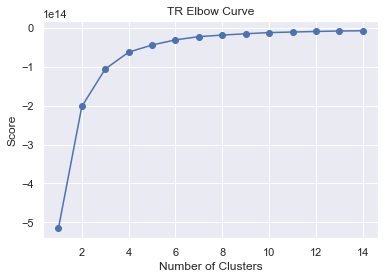

In [14]:
# Plotting TR elbow curve

pl.plot(df2_num_cl, df2_score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('TR Elbow Curve')
pl.show()

# 1.1: k-means clustering for AU

In [15]:
# Create the k-means object with 4 clusters

kmeans1 = KMeans(n_clusters = 4, n_jobs = -1)

In [16]:
# Fit the k-means object to the data.

kmeans1.fit(df1_sel)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [17]:
df1_sel['clusters'] = kmeans1.fit_predict(df1_sel)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-17-920e63b35af3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_sel['clusters'] = kmeans1.fit_predict(df1_sel)


In [18]:
df1_sel.head()

,Position,Streams,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_Signature,Key,Valence,Countries Rep,Weeks Count,clusters
0,1,2031338.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,10,3
1,1,2260974.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,10,3
2,1,2277839.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,10,3
3,1,2367836.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,10,3
4,1,2535418.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,10,3


In [19]:
df1_sel['clusters'].value_counts()

0    1486
2     401
1     101
3      12
Name: clusters, dtype: int64

In [24]:
colors = []
for i in kmeans1.labels_:
    if i == 0:
        colors.append('blue')
    if i == 2:
        colors.append('green')
    if i == 1:
        colors.append('red')
    elif i ==3:
        colors.append('orange')

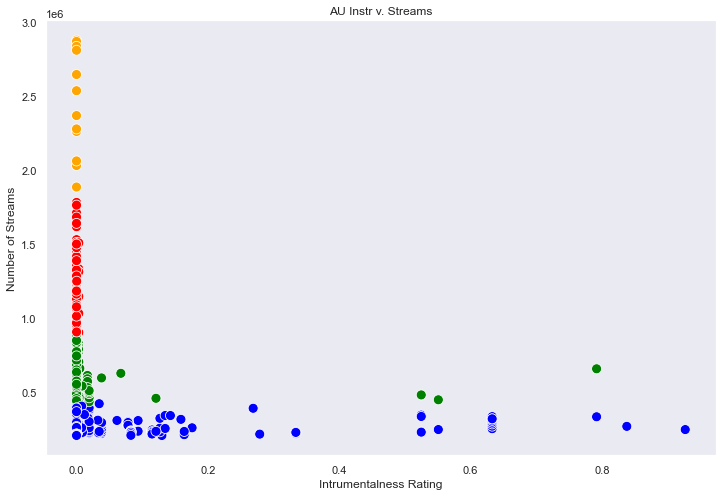

In [25]:
# Plotting clusters for the Instrumentalness v. Streams

plt.figure(figsize=(12,8))
ax1_1 = sns.scatterplot(x=df1_sel['Instrumentalness'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_1.grid(False)
plt.xlabel('Intrumentalness Rating')
plt.ylabel('Number of Streams')
pl.title('AU Instr v. Streams')
plt.show()

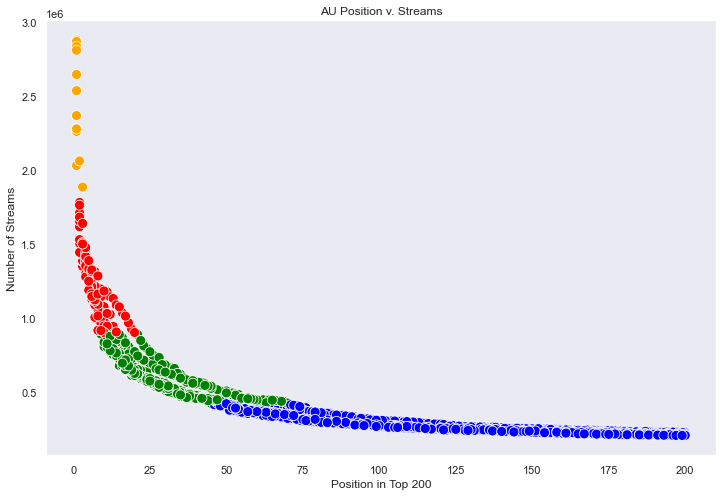

In [26]:
# Plotting clusters for the Position v. Streams

plt.figure(figsize=(12,8))
ax1_2 = sns.scatterplot(x=df1_sel['Position'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_2.grid(False)
plt.xlabel('Position in Top 200')
plt.ylabel('Number of Streams')
pl.title('AU Position v. Streams')
plt.show()

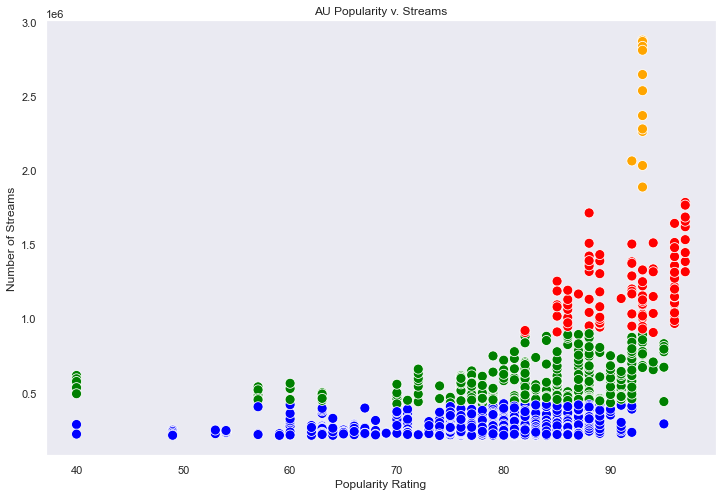

In [27]:
# Plotting clusters for the Popularity v. Streams

plt.figure(figsize=(12,8))
ax1_3 = sns.scatterplot(x=df1_sel['Popularity'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_3.grid(False)
plt.xlabel('Popularity Rating')
plt.ylabel('Number of Streams')
pl.title('AU Popularity v. Streams')
plt.show()

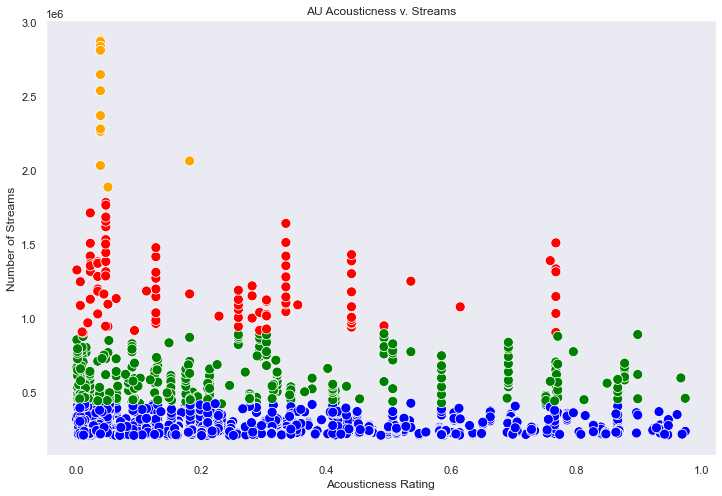

In [29]:
# Plotting clusters for the Acousticness v. Streams

plt.figure(figsize=(12,8))
ax1_4 = sns.scatterplot(x=df1_sel['Acousticness'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_4.grid(False)
plt.xlabel('Acousticness Rating')
plt.ylabel('Number of Streams')
pl.title('AU Acousticness v. Streams')
plt.show()

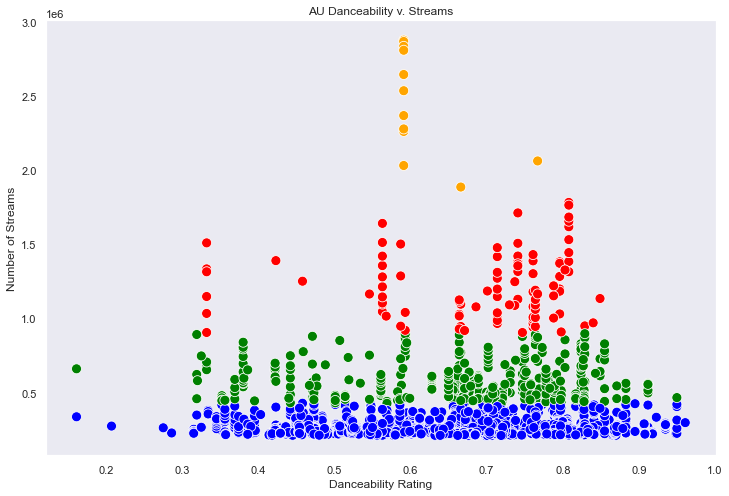

In [28]:
# Plotting clusters for the Danceability v. Streams

plt.figure(figsize=(12,8))
ax1_5 = sns.scatterplot(x=df1_sel['Danceability'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_5.grid(False)
plt.xlabel('Danceability Rating')
plt.ylabel('Number of Streams')
pl.title('AU Danceability v. Streams')
plt.show()

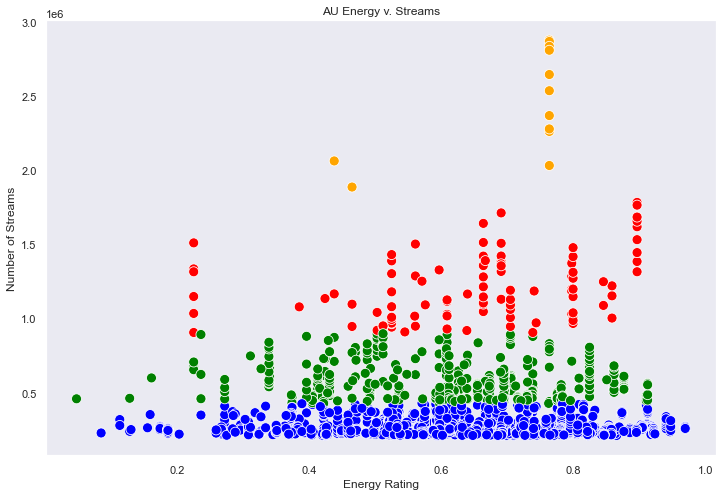

In [30]:
# Plotting clusters for the Energy v. Streams

plt.figure(figsize=(12,8))
ax1_6 = sns.scatterplot(x=df1_sel['Energy'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_6.grid(False)
plt.xlabel('Energy Rating')
plt.ylabel('Number of Streams')
pl.title('AU Energy v. Streams')
plt.show()

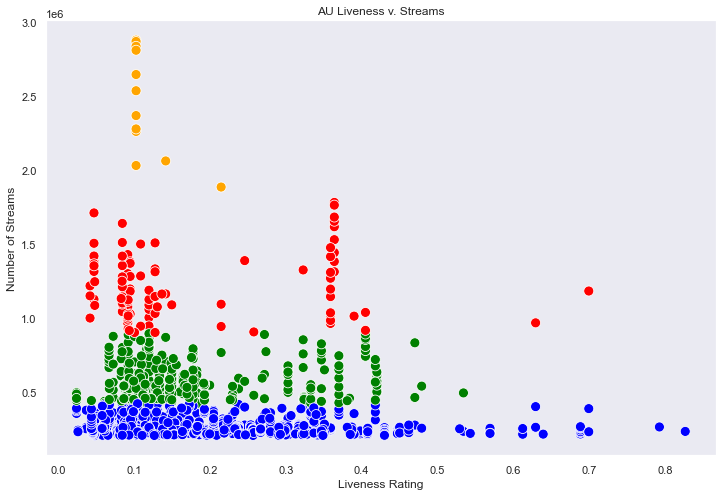

In [31]:
# Plotting clusters for the Liveness v. Streams

plt.figure(figsize=(12,8))
ax1_7 = sns.scatterplot(x=df1_sel['Liveness'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_7.grid(False)
plt.xlabel('Liveness Rating')
plt.ylabel('Number of Streams')
pl.title('AU Liveness v. Streams')
plt.show()

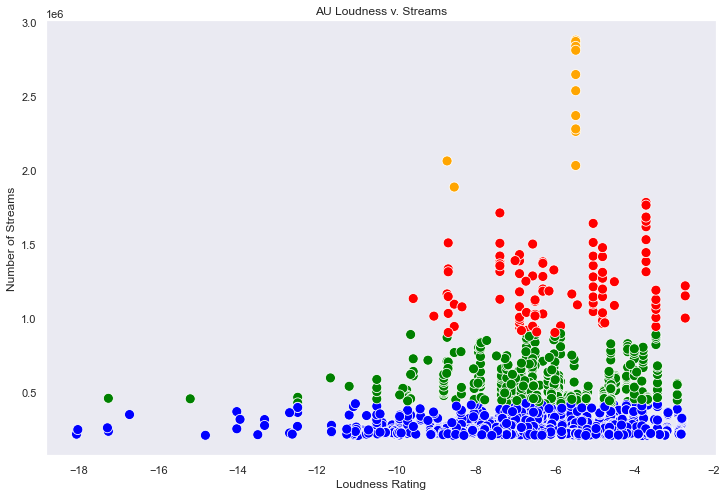

In [32]:
# Plotting clusters for the Loudness v. Streams

plt.figure(figsize=(12,8))
ax1_8 = sns.scatterplot(x=df1_sel['Loudness'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_8.grid(False)
plt.xlabel('Loudness Rating')
plt.ylabel('Number of Streams')
pl.title('AU Loudness v. Streams')
plt.show()

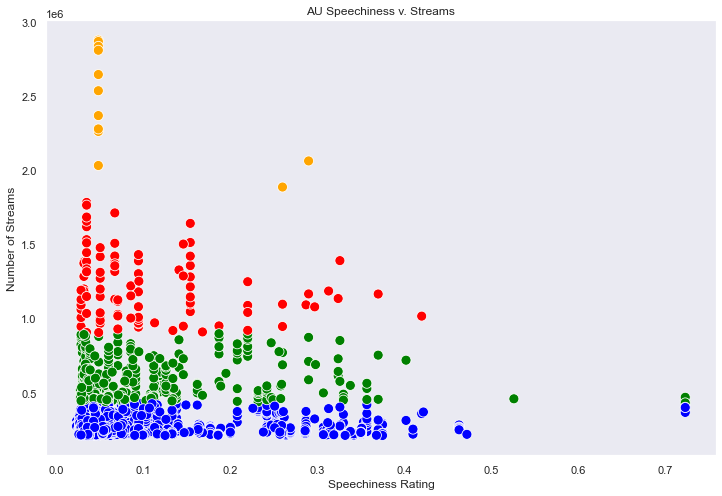

In [33]:
# Plotting clusters for the Speechiness v. Streams

plt.figure(figsize=(12,8))
ax1_9 = sns.scatterplot(x=df1_sel['Speechiness'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_9.grid(False)
plt.xlabel('Speechiness Rating')
plt.ylabel('Number of Streams')
pl.title('AU Speechiness v. Streams')
plt.show()

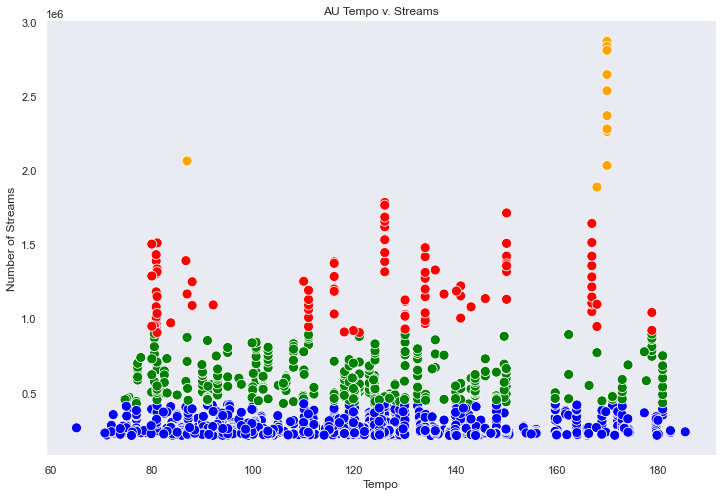

In [34]:
# Plotting clusters for the Tempo v. Streams

plt.figure(figsize=(12,8))
ax1_10 = sns.scatterplot(x=df1_sel['Tempo'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_10.grid(False)
plt.xlabel('Tempo')
plt.ylabel('Number of Streams')
pl.title('AU Tempo v. Streams')
plt.show()

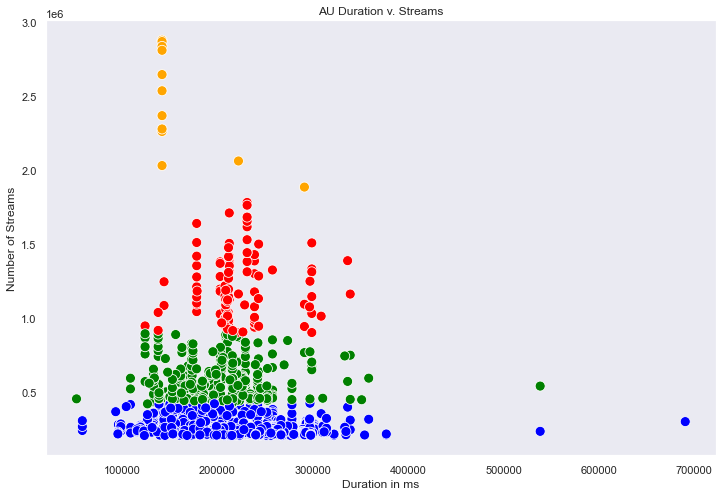

In [35]:
# Plotting clusters for the Duration v. Streams

plt.figure(figsize=(12,8))
ax1_11 = sns.scatterplot(x=df1_sel['Length'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_11.grid(False)
plt.xlabel('Duration in ms')
plt.ylabel('Number of Streams')
pl.title('AU Duration v. Streams')
plt.show()

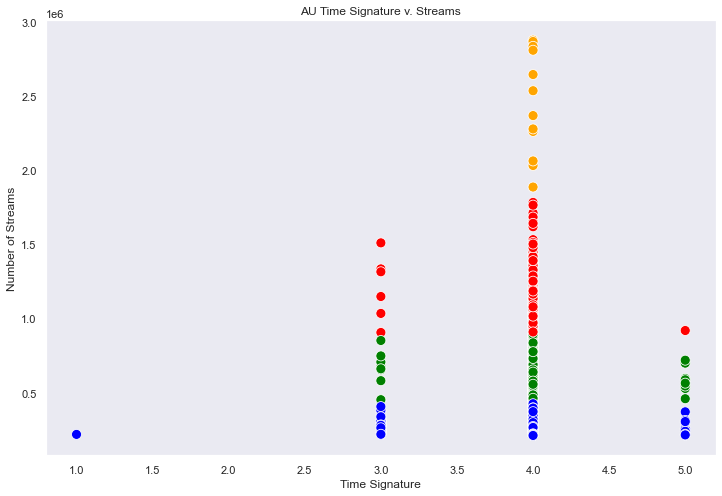

In [36]:
# Plotting clusters for the Time Signature v. Streams

plt.figure(figsize=(12,8))
ax1_12 = sns.scatterplot(x=df1_sel['Time_Signature'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_12.grid(False)
plt.xlabel('Time Signature')
plt.ylabel('Number of Streams')
pl.title('AU Time Signature v. Streams')
plt.show()

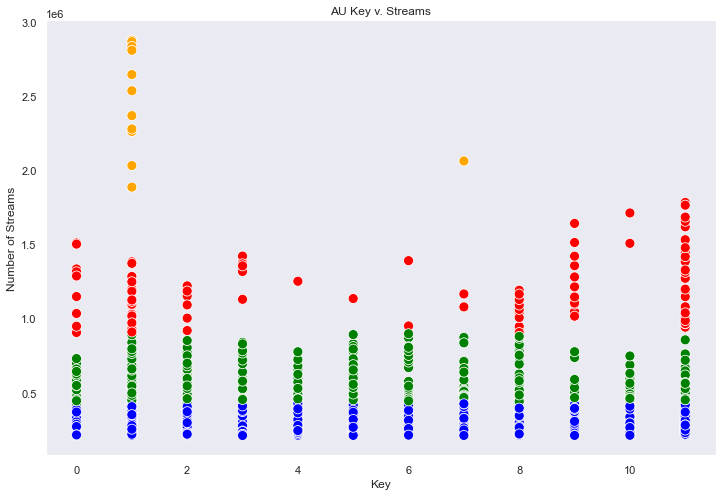

In [37]:
# Plotting clusters for the Key v. Streams

plt.figure(figsize=(12,8))
ax1_13 = sns.scatterplot(x=df1_sel['Key'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_13.grid(False)
plt.xlabel('Key')
plt.ylabel('Number of Streams')
pl.title('AU Key v. Streams')
plt.show()

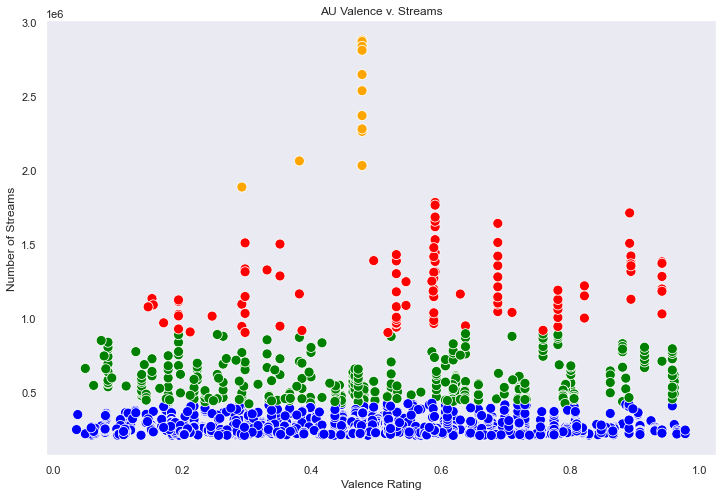

In [38]:
# Plotting clusters for the Valence v. Streams

plt.figure(figsize=(12,8))
ax1_14 = sns.scatterplot(x=df1_sel['Valence'], y=df1_sel['Streams'],
                    c=colors, s=100)


ax1_14.grid(False)
plt.xlabel('Valence Rating')
plt.ylabel('Number of Streams')
pl.title('AU Valence v. Streams')
plt.show()

# 1.2 - Calculating descriptive statistics for AU clusters

In [39]:
df1_sel.loc[df1_sel['clusters'] == 2, 'cluster'] = 'green'
df1_sel.loc[df1_sel['clusters'] == 3, 'cluster'] = 'orange'
df1_sel.loc[df1_sel['clusters'] == 1, 'cluster'] = 'red'
df1_sel.loc[df1_sel['clusters'] == 0, 'cluster'] = 'blue'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [40]:
AU_desc_stats = df1_sel.groupby('cluster').agg({'Position':['mean', 'median'],
                         'Streams':['mean', 'median'],
                         'Length':['mean', 'median'],
                          'Popularity':['mean', 'median'],
                           'Acousticness':['mean', 'median'],
                           'Danceability':['mean', 'median'],
                           'Energy':['mean', 'median'],
                           'Instrumentalness':['mean', 'median'],
                           'Liveness':['mean', 'median'],
                           'Loudness':['mean', 'median'],
                           'Speechiness':['mean', 'median'],
                           'Tempo':['mean', 'median'],
                           'Time_Signature':['mean', 'median'],
                           'Key':['mean', 'median'],
                           'Valence':['mean', 'median']})

AU_desc_stats

Position              Streams                    Length            \
               mean median          mean     median           mean    median   
cluster                                                                        
blue     125.989906    126  2.752635e+05   259230.0  208384.662180  203893.0   
green     32.493766     32  5.789355e+05   543031.0  196489.104738  197898.0   
orange     1.250000      1  2.454380e+06  2451627.0  160933.666667  141805.0   
red        7.267327      7  1.214153e+06  1179764.0  221338.623762  212352.0   

        Popularity        Acousticness          ... Speechiness          \
              mean median         mean  median  ...        mean  median   
cluster                                         ...                       
blue     79.666218   82.0     0.269647  0.1820  ...    0.097370  0.0572   
green    83.137157   86.0     0.243294  0.1510  ...    0.100559  0.0598   
orange   92.916667   93.0     0.051192  0.0383  ...    0.086083  0.0483   
red      91.554455   92.0     0.230457  0.1270  ...    0.106201  0.0707   

              Tempo          Time_Signature              Key          Valence  \
               mean   median           mean median      mean median      mean   
cluster                                                                         
blue     118.186861  119.674       3.963661    4.0  5.222073      5  0.503463   
green    119.340239  119.976       3.997506    4.0  4.299252      4  0.516177   
orange   162.849333  169.928       4.000000    4.0  1.500000      1  0.454417   
red      122.995218  126.026       3.950495    4.0  6.277228      8  0.583703   

                
        median  
cluster         
blue     0.499  
green    0.498  
orange   0.478  
red      0.589  

[4 rows x 30 columns]

In [41]:
AU_desc_stats.to_clipboard()

# 2.1 - k-means clustering for TR

In [42]:
# Create the k-means object with 4 clusters

kmeans2 = KMeans(n_clusters = 4, n_jobs = -1)

In [43]:
# Fit the k-means object to the data.

kmeans2.fit(df2_sel)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [44]:
df2_sel['clusters'] = kmeans2.fit_predict(df2_sel)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-44-737bc4e0003e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_sel['clusters'] = kmeans2.fit_predict(df2_sel)


In [45]:
df2_sel.head()

,Position,Streams,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_Signature,Key,Valence,Countries Rep,Weeks Count,clusters
50,52,509120.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,9,0
51,47,556634.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,9,3
52,42,564559.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,9,3
53,35,588238.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,9,3
54,37,645924.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478,8,9,3


In [46]:
df2_sel['clusters'].value_counts()

0    1510
3     357
2     112
1      17
Name: clusters, dtype: int64

In [47]:
colors = []
for i in kmeans2.labels_:
    if i == 0:
        colors.append('blue')
    if i == 3:
        colors.append('green')
    if i == 2:
        colors.append('red')
    elif i == 1:
        colors.append('orange')

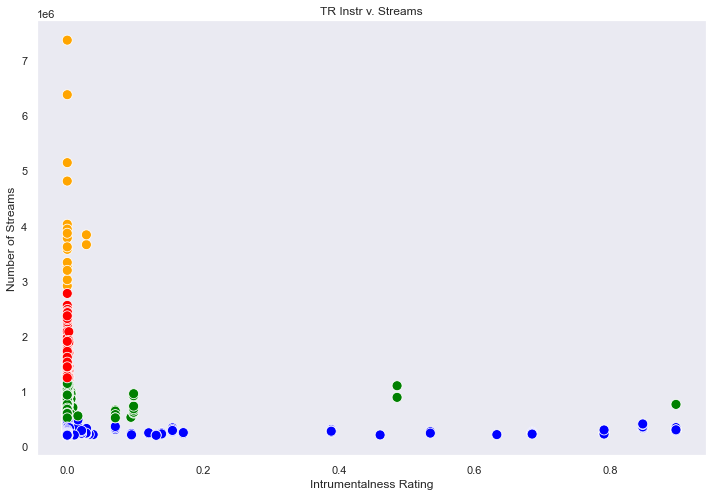

In [48]:
# Plotting clusters for the Instrumentalness v. Streams

plt.figure(figsize=(12,8))
ax2_1 = sns.scatterplot(x=df2_sel['Instrumentalness'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_1.grid(False)
plt.xlabel('Intrumentalness Rating')
plt.ylabel('Number of Streams')
pl.title('TR Instr v. Streams')
plt.show()

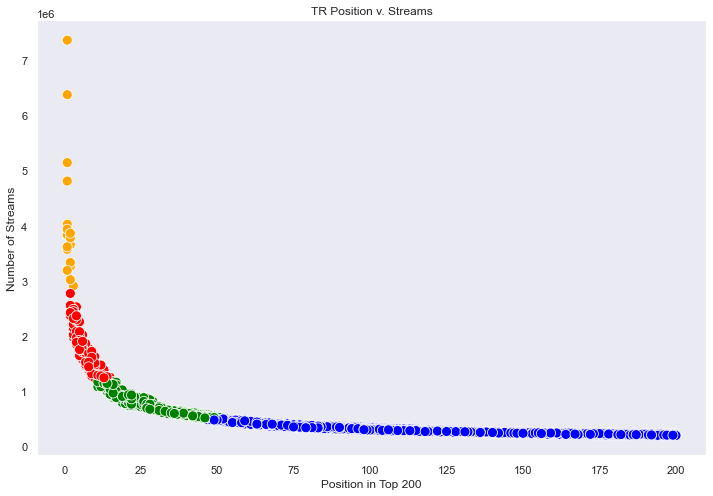

In [49]:
# Plotting clusters for the Position v. Streams

plt.figure(figsize=(12,8))
ax2_2 = sns.scatterplot(x=df2_sel['Position'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_2.grid(False)
plt.xlabel('Position in Top 200')
plt.ylabel('Number of Streams')
pl.title('TR Position v. Streams')
plt.show()

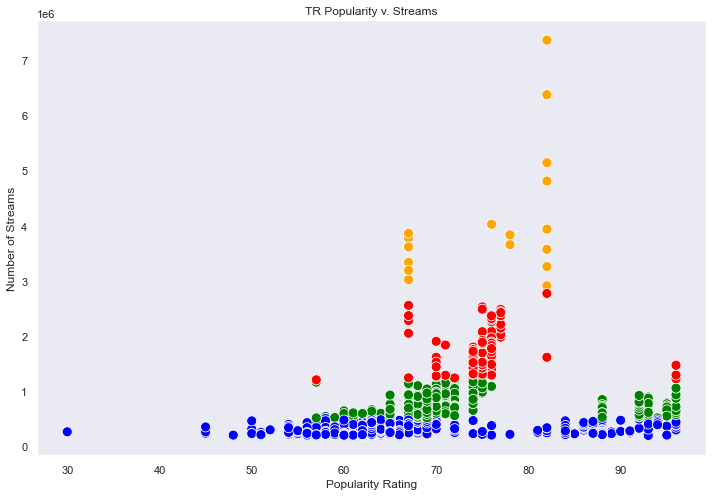

In [50]:
# Plotting clusters for the Popularity v. Streams

plt.figure(figsize=(12,8))
ax2_3 = sns.scatterplot(x=df2_sel['Popularity'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_3.grid(False)
plt.xlabel('Popularity Rating')
plt.ylabel('Number of Streams')
pl.title('TR Popularity v. Streams')
plt.show()

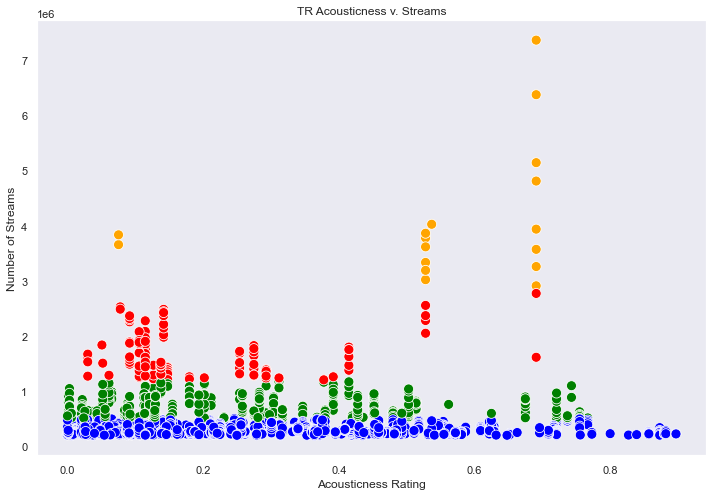

In [51]:
# Plotting clusters for the Acousticness v. Streams

plt.figure(figsize=(12,8))
ax2_4 = sns.scatterplot(x=df2_sel['Acousticness'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_4.grid(False)
plt.xlabel('Acousticness Rating')
plt.ylabel('Number of Streams')
pl.title('TR Acousticness v. Streams')
plt.show()

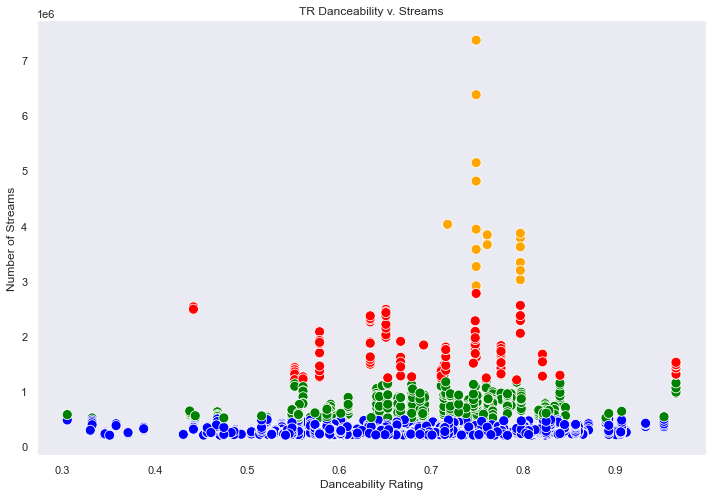

In [52]:
# Plotting clusters for the Danceability v. Streams

plt.figure(figsize=(12,8))
ax2_5 = sns.scatterplot(x=df2_sel['Danceability'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_5.grid(False)
plt.xlabel('Danceability Rating')
plt.ylabel('Number of Streams')
pl.title('TR Danceability v. Streams')
plt.show()

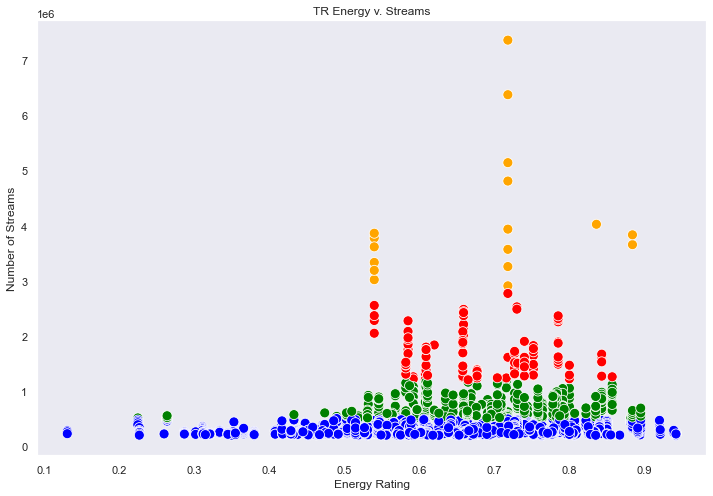

In [53]:
# Plotting clusters for the Energy v. Streams

plt.figure(figsize=(12,8))
ax2_6 = sns.scatterplot(x=df2_sel['Energy'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_6.grid(False)
plt.xlabel('Energy Rating')
plt.ylabel('Number of Streams')
pl.title('TR Energy v. Streams')
plt.show()

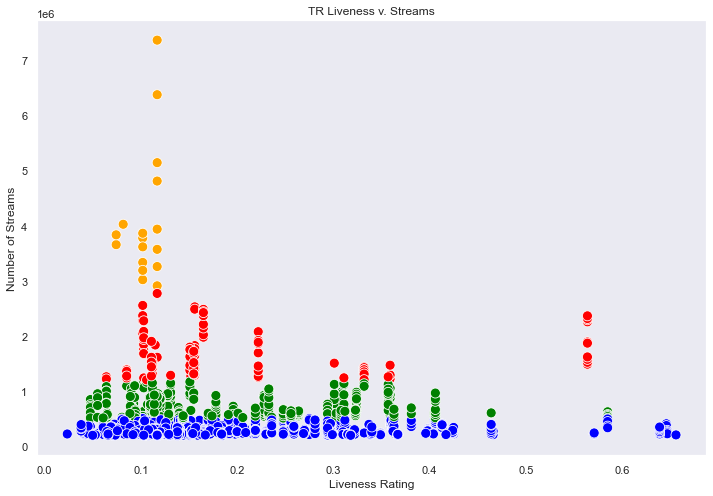

In [54]:
# Plotting clusters for the Liveness v. Streams

plt.figure(figsize=(12,8))
ax2_7 = sns.scatterplot(x=df2_sel['Liveness'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_7.grid(False)
plt.xlabel('Liveness Rating')
plt.ylabel('Number of Streams')
pl.title('TR Liveness v. Streams')
plt.show()

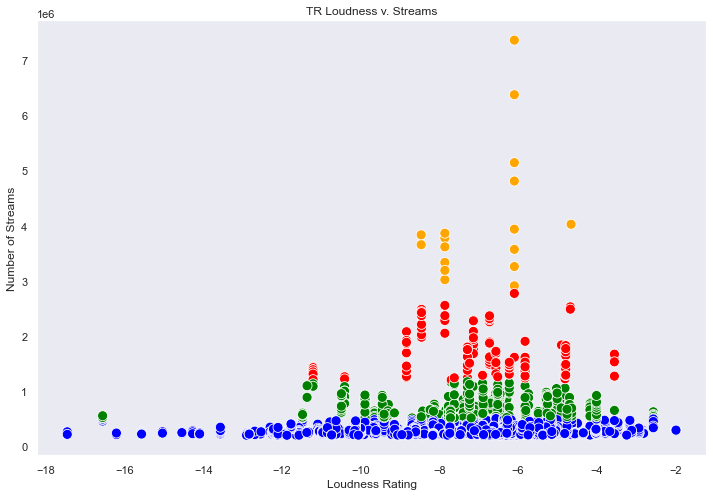

In [55]:
# Plotting clusters for the Loudness v. Streams

plt.figure(figsize=(12,8))
ax2_8 = sns.scatterplot(x=df2_sel['Loudness'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_8.grid(False)
plt.xlabel('Loudness Rating')
plt.ylabel('Number of Streams')
pl.title('TR Loudness v. Streams')
plt.show()

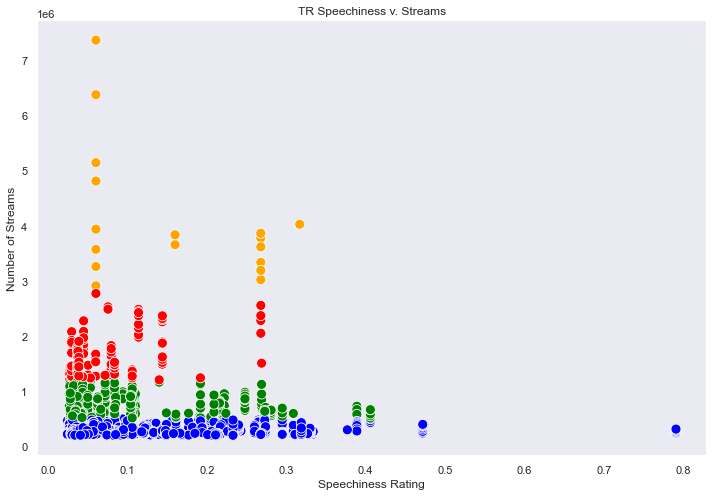

In [56]:
# Plotting clusters for the Speechiness v. Streams

plt.figure(figsize=(12,8))
ax2_9 = sns.scatterplot(x=df2_sel['Speechiness'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_9.grid(False)
plt.xlabel('Speechiness Rating')
plt.ylabel('Number of Streams')
pl.title('TR Speechiness v. Streams')
plt.show()

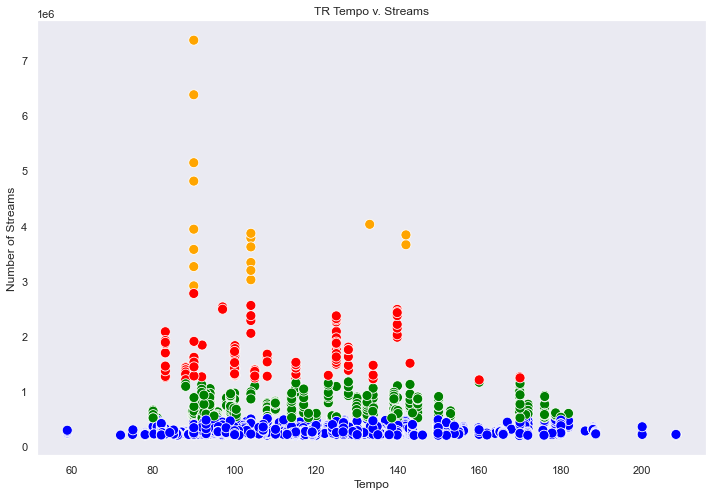

In [57]:
# Plotting clusters for the Tempo v. Streams

plt.figure(figsize=(12,8))
ax2_10 = sns.scatterplot(x=df2_sel['Tempo'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_10.grid(False)
plt.xlabel('Tempo')
plt.ylabel('Number of Streams')
pl.title('TR Tempo v. Streams')
plt.show()

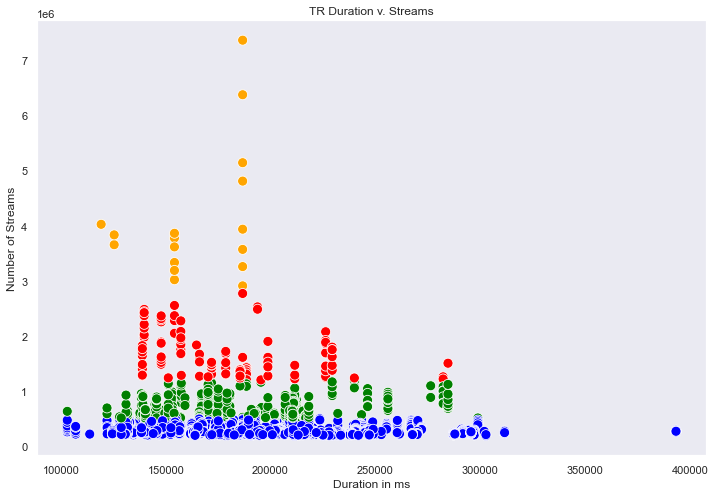

In [58]:
# Plotting clusters for the Duration v. Streams

plt.figure(figsize=(12,8))
ax2_11 = sns.scatterplot(x=df2_sel['Length'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_11.grid(False)
plt.xlabel('Duration in ms')
plt.ylabel('Number of Streams')
pl.title('TR Duration v. Streams')
plt.show()

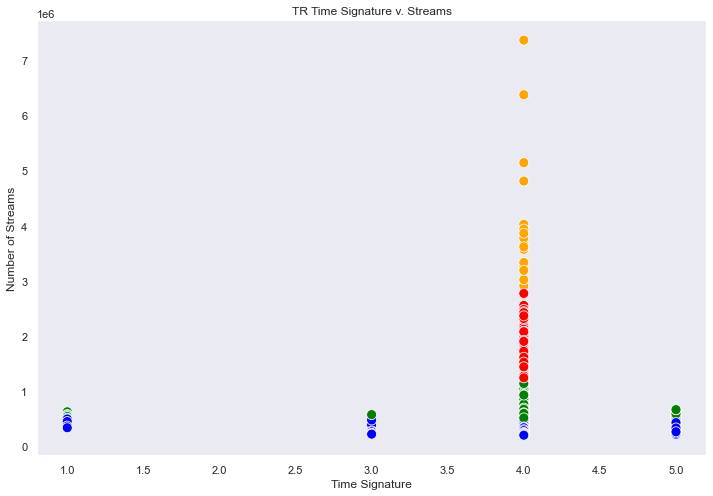

In [59]:
# Plotting clusters for the Time Signature v. Streams

plt.figure(figsize=(12,8))
ax2_12 = sns.scatterplot(x=df2_sel['Time_Signature'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_12.grid(False)
plt.xlabel('Time Signature')
plt.ylabel('Number of Streams')
pl.title('TR Time Signature v. Streams')
plt.show()

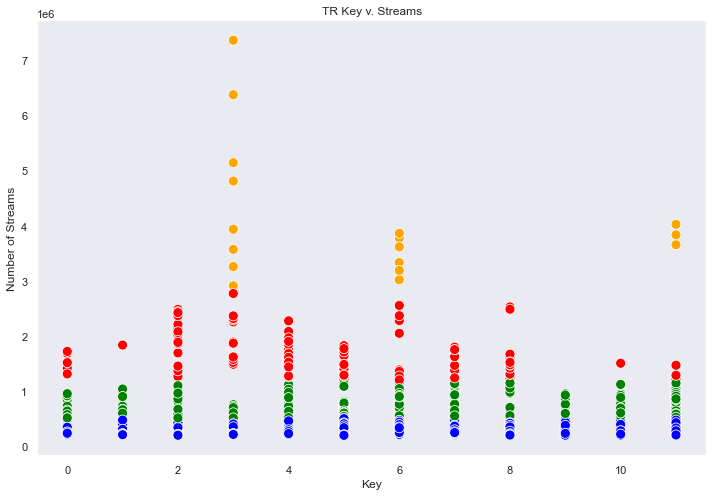

In [60]:
# Plotting clusters for the Key v. Streams

plt.figure(figsize=(12,8))
ax2_13 = sns.scatterplot(x=df2_sel['Key'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_13.grid(False)
plt.xlabel('Key')
plt.ylabel('Number of Streams')
pl.title('TR Key v. Streams')
plt.show()

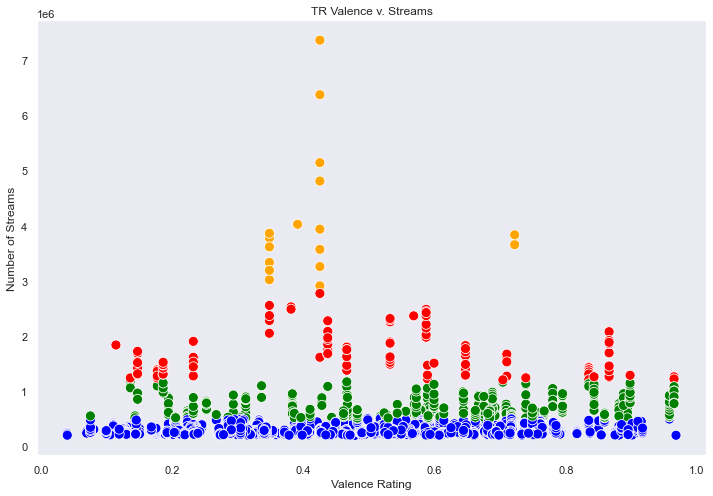

In [61]:
# Plotting clusters for the Valence v. Streams

plt.figure(figsize=(12,8))
ax2_14 = sns.scatterplot(x=df2_sel['Valence'], y=df2_sel['Streams'],
                    c=colors, s=100)


ax2_14.grid(False)
plt.xlabel('Valence Rating')
plt.ylabel('Number of Streams')
pl.title('TR Valence v. Streams')
plt.show()

# 1.2 - Calculating descriptive statistics for TR clusters

In [62]:
df2_sel.loc[df2_sel['clusters'] == 0, 'cluster'] = 'blue'
df2_sel.loc[df2_sel['clusters'] == 3, 'cluster'] = 'green'
df2_sel.loc[df2_sel['clusters'] == 2, 'cluster'] = 'red'
df2_sel.loc[df2_sel['clusters'] == 1, 'cluster'] = 'orange'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [69]:
TR_desc_stats = df2_sel.groupby('cluster').agg({'Position':['mean', 'median'],
                         'Streams':['mean', 'median'],
                         'Length':['mean', 'median'],
                          'Popularity':['mean', 'median'],
                           'Acousticness':['mean', 'median'],
                           'Danceability':['mean', 'median'],
                           'Energy':['mean', 'median'],
                           'Instrumentalness':['mean', 'median'],
                           'Liveness':['mean', 'median'],
                           'Loudness':['mean', 'median'],
                           'Speechiness':['mean', 'median'],
                           'Tempo':['mean', 'median'],
                           'Time_Signature':['mean', 'median'],
                           'Key':['mean', 'median'],
                           'Valence':['mean', 'median']})

TR_desc_stats

Position              Streams                    Length            \
               mean median          mean     median           mean    median   
cluster                                                                        
blue     124.703974    125  3.006392e+05   274750.0  198453.584106  195439.0   
green     31.296919     31  7.275827e+05   676131.0  186775.137255  177447.0   
orange     1.470588      1  4.100067e+06  3779246.0  164043.294118  154173.0   
red        7.910714      8  1.675022e+06  1557508.5  178936.508929  175260.0   

        Popularity        Acousticness         ... Speechiness          \
              mean median         mean median  ...        mean  median   
cluster                                        ...                       
blue     64.774834   63.0     0.274131  0.215  ...    0.105472  0.0610   
green    71.910364   69.0     0.254967  0.202  ...    0.105647  0.0661   
orange   75.882353   78.0     0.552012  0.537  ...    0.160435  0.1600   
red      75.026786   75.0     0.198821  0.142  ...    0.080223  0.0603   

              Tempo          Time_Signature              Key          Valence  \
               mean   median           mean median      mean median      mean   
cluster                                                                         
blue     122.533242  120.026       3.996026    4.0  5.774172      6  0.487770   
green    123.487328  120.038       3.971989    4.0  5.257703      5  0.582866   
orange   103.598118  104.001       4.000000    4.0  5.470588      6  0.430765   
red      111.566777  104.957       4.000000    4.0  4.714286      5  0.514759   

                 
         median  
cluster          
blue     0.5005  
green    0.5990  
orange   0.4250  
red      0.5320  

[4 rows x 30 columns]

In [70]:
TR_desc_stats.to_clipboard()

# 3.0 - Exporting cluster vizualizations

In [65]:
# Exporting AU cluster visualizations with savefig()

ax1_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_1.png'))
ax1_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_2.png'))
ax1_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_3.png'))
ax1_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_4.png'))
ax1_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_5.png'))
ax1_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_6.png'))
ax1_7.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_7.png'))
ax1_8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_8.png'))
ax1_9.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_9.png'))
ax1_10.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_10.png'))
ax1_11.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_11.png'))
ax1_12.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_12.png'))
ax1_13.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_13.png'))
ax1_14.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AU_14.png'))



In [66]:
# Exporting TR cluster visualizations with savefig()

ax2_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_1.png'))
ax2_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_2.png'))
ax2_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_3.png'))
ax2_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_4.png'))
ax2_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_5.png'))
ax2_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_6.png'))
ax2_7.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_7.png'))
ax2_8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_8.png'))
ax2_9.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_9.png'))
ax2_10.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_10.png'))
ax2_11.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_11.png'))
ax2_12.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_12.png'))
ax2_13.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_13.png'))
ax2_14.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TR_14.png'))